In [1]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Bibliotecas para os modelos de machine learning
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Bibliotecas para métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# verificação de valores vaziu ou nulo
total_nulos = train_df.isnull().sum().sum()
total_vazios = (train_df == '').sum().sum()

print(f"Total de valores nulos: {total_nulos}")
print(f"Total de campos vazios: {total_vazios}")

Total de valores nulos: 866
Total de campos vazios: 0


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Preenchendo valores nulos em Age com a média
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\Ediloy\AppData\Local\Temp\ipykernel_15212\217807486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\Ediloy\AppData\Local\Temp\ipykernel_15212\217807486.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [6]:
# 1. Para a variável 'Sex', podemos usar Label Encoding, pois há apenas duas categorias
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [7]:
# 2. Para a variável 'Embarked', podemos usar One-Hot Encoding, pois há mais de duas categorias
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

In [8]:
# trantando a variavel categorica Cabin
train_df['Cabin_known'] = train_df['Cabin'].notna().astype(int)
test_df['Cabin_known'] = test_df['Cabin'].notna().astype(int)

train_df = train_df.drop(columns=['Cabin'])
test_df_teste = test_df.drop(columns=['Cabin'])

In [9]:
train_df = train_df.drop(columns=['Name','Ticket'])

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_known
0,1,0,3,0,22.0,1,0,7.2500,False,False,True,0
1,2,1,1,1,38.0,1,0,71.2833,True,False,False,1
2,3,1,3,1,26.0,0,0,7.9250,False,False,True,0
3,4,1,1,1,35.0,1,0,53.1000,False,False,True,1
4,5,0,3,0,35.0,0,0,8.0500,False,False,True,0


In [11]:
# Separação das melhores classes para ser usada.
variaveis = ['Sex', 'Cabin_known','Fare','Pclass','Age']

In [12]:
# Separação das variaveis para uso
X = train_df[variaveis]
y = train_df['Survived']

X_test_final = test_df[variaveis]

# **XGBClassifier**

In [24]:
xgb_base = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    tree_method='hist',
    random_state=42
)

In [25]:
param_dist_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [26]:

random_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    scoring='accuracy',
    cv=3,
    n_iter=10,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_xgb.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 1, 5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [27]:
melhor_xgb = random_xgb.best_estimator_

In [28]:
y_pred_xgboost = melhor_xgb.predict(X)

In [29]:
relatorio = classification_report(y, y_pred_xgboost)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       549
           1       0.88      0.77      0.83       342

    accuracy                           0.87       891
   macro avg       0.88      0.86      0.86       891
weighted avg       0.87      0.87      0.87       891



# **SVM**

In [30]:
model_svm_base = SVC(
    kernel='linear',
    probability=True,
    random_state=1
    )

In [31]:
param_dist = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
}

In [32]:
random_svm = GridSearchCV(
    estimator=model_svm_base,
    param_grid=param_dist, 
    scoring='accuracy',  
    cv=3,                
    verbose=1,           
    n_jobs=-1,           
    )
random_svm.fit(X, y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=SVC(kernel='linear', probability=True, random_state=1),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [33]:
melhor_svm = random_svm.best_estimator_

In [34]:

y_pred_svm = melhor_svm.predict(X)

In [35]:
print("ACURÁCIA (SVM):", accuracy_score(y, y_pred_svm))
print("\nMATRIZ DE CONFUSÃO:\n", confusion_matrix(y, y_pred_svm))
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y, y_pred_svm))

ACURÁCIA (SVM): 0.7867564534231201

MATRIZ DE CONFUSÃO:
 [[468  81]
 [109 233]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891



# **Regressão Logística**

In [50]:
lr_base = LogisticRegression(
    solver='saga',       
    max_iter=10000,
    random_state=42
)

In [51]:
param_dist_lr = {
    'penalty': ['l1', 'l2'],
    'solver': ['saga'],    
    'C': [0.1, 1, 10],
    'l1_ratio': [None, 0.0, 0.5, 1.0]
}

In [54]:
random_lr = RandomizedSearchCV(
    estimator=lr_base,
    param_distributions=param_dist_lr,
    n_iter=24,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_lr.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=10000, random_state=42,
                                                solver='saga'),
                   n_iter=24, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'l1_ratio': [None, 0.0, 0.5, 1.0],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga']},
                   random_state=42, scoring='accuracy', verbose=2)

In [55]:
melhor_lr = random_lr.best_estimator_

In [56]:
y_pred_LogRegress = melhor_lr.predict(X)

In [57]:
print("ACURÁCIA (LR):", accuracy_score(y, y_pred_LogRegress))
print("\nMATRIZ DE CONFUSÃO:\n", confusion_matrix(y, y_pred_LogRegress))
print("\nRELATÓRIO DE CLASSIFICAÇÃO:\n", classification_report(y, y_pred_LogRegress))

ACURÁCIA (LR): 0.7833894500561167

MATRIZ DE CONFUSÃO:
 [[496  53]
 [140 202]]

RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       549
           1       0.79      0.59      0.68       342

    accuracy                           0.78       891
   macro avg       0.79      0.75      0.76       891
weighted avg       0.78      0.78      0.78       891



In [59]:
# Ajustando arquivo para o submit do kaggle
y_pred_xgb = melhor_xgb.predict(X_test_final)

submission_xgb = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred_xgb
})

submission_xgb.to_csv('sub_xgb.csv', index=False)

In [60]:
# Ajustando arquivo para o submit do kaggle
y_pred_svm = melhor_svm.predict(X_test_final)

submission_svm = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred_svm
})

submission_svm.to_csv('sub_svm.csv', index=False)

In [ ]:
# Ajustando arquivo para o submit do kaggle
y_pred_lr = melhor_lr.predict(X_test_final)

submission_lr = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred_lr
})

submission_lr.to_csv('sub_lr.csv', index=False)

Subimissão no Kaggle

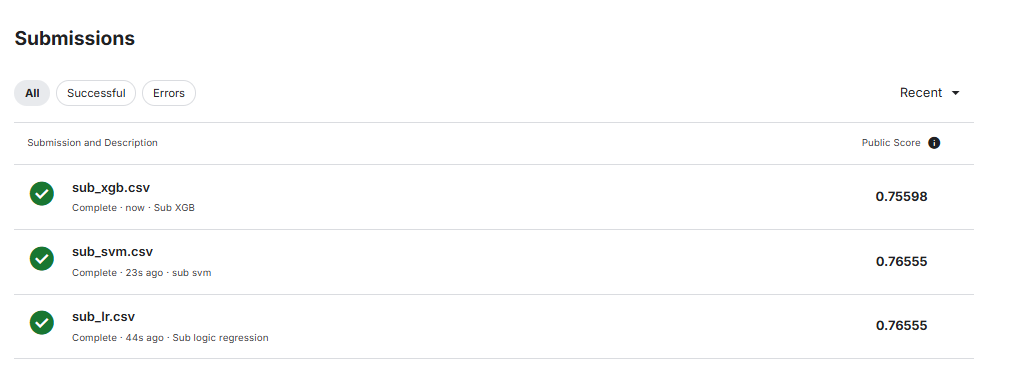